In [41]:
import pandas as pd

In [42]:
df = pd.read_csv('NIFTY 50 - 1 Day data 2015 to Aug 2024 GO CORONA.csv')
df.dropna(subset=['close_open_diff'], how='all', inplace=True)


In [43]:
df

,Unnamed: 0,high,low,open,close,year,month,day,close_open_diff
0,2015-01-09,8303.00,8191.10,8285.45,8280.25,2015,1,9,-11.10
1,2015-01-12,8332.25,8245.60,8291.35,8326.55,2015,1,12,-19.60
2,2015-01-13,8356.65,8268.15,8346.15,8303.80,2015,1,13,-3.45
3,2015-01-14,8326.30,8236.75,8307.25,8287.75,2015,1,14,-137.45
4,2015-01-15,8526.90,8380.75,8425.20,8461.15,2015,1,15,-92.25
...,...,...,...,...,...,...,...,...,...
1634,2024-08-21,24787.95,24654.50,24680.55,24781.90,2024,8,21,-81.50
1635,2024-08-22,24867.35,24784.45,24863.40,24810.90,2024,8,22,-34.50
1636,2024-08-23,24858.40,24771.65,24845.40,24831.85,2024,8,23,-74.25
1637,2024-08-26,25043.80,24874.70,24906.10,25011.45,2024,8,26,-13.35


In [44]:
df_5_min = pd.read_csv('NIFTY 50 - 5m data 2015 to Aug 2024.csv')
df_5_min = df_5_min[~df_5_min['year'].isin([2019, 2020, 2021])]

In [45]:
df.shape

(1639, 9)

In [46]:
df_5_min.shape

(1640, 10)

In [47]:
df.head(15)

,Unnamed: 0,high,low,open,close,year,month,day,close_open_diff
0,2015-01-09,8303.00,8191.10,8285.45,8280.25,2015,1,9,-11.10
1,2015-01-12,8332.25,8245.60,8291.35,8326.55,2015,1,12,-19.60
2,2015-01-13,8356.65,8268.15,8346.15,8303.80,2015,1,13,-3.45
3,2015-01-14,8326.30,8236.75,8307.25,8287.75,2015,1,14,-137.45
4,2015-01-15,8526.90,8380.75,8425.20,8461.15,2015,1,15,-92.25
5,2015-01-19,8570.80,8531.70,8553.40,8550.30,2015,1,19,-24.80
6,2015-01-20,8707.75,8574.65,8575.10,8691.25,2015,1,20,-28.40
7,2015-01-21,8741.50,8689.70,8719.65,8728.05,2015,1,21,-17.80
8,2015-01-22,8774.00,8727.15,8745.85,8762.20,2015,1,22,-65.75
9,2015-01-23,8866.15,8795.60,8827.95,8823.55,2015,1,23,-47.80


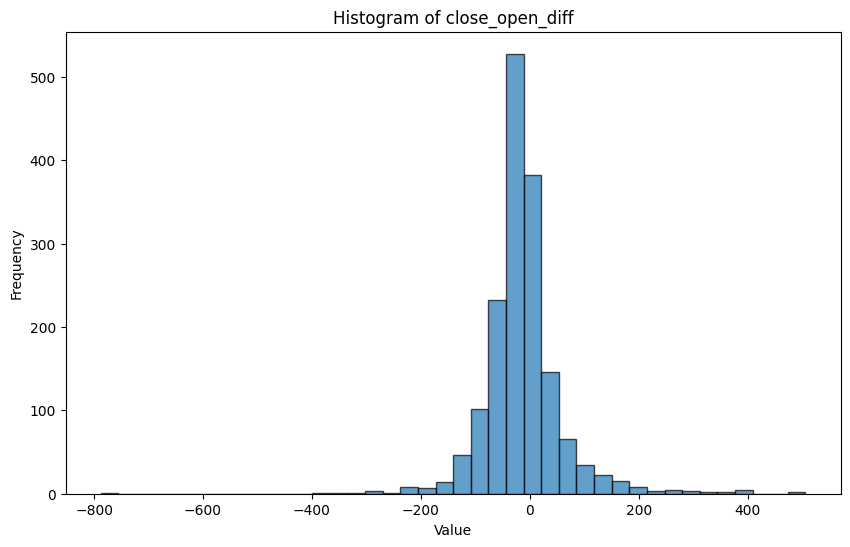

In [48]:
import matplotlib.pyplot as plt

# Replace 'column_name' with your numeric column
plt.figure(figsize=(10, 6))
plt.hist(df['close_open_diff'], bins=40, edgecolor='k', alpha=0.7)
plt.title('Histogram of close_open_diff')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


<Axes: title={'center': 'Distribution Without Outliers'}, ylabel='Frequency'>

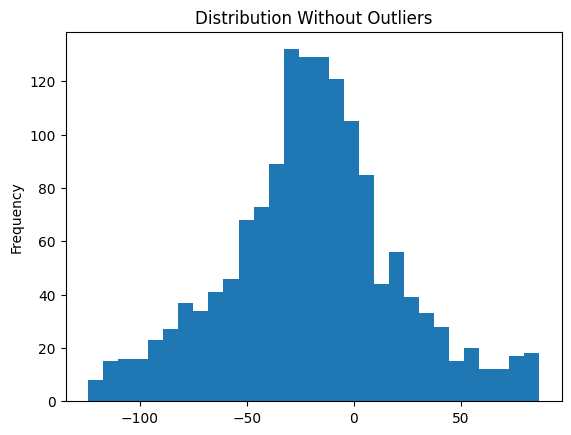

In [49]:
# Define a function to remove outliers based on IQR method
def remove_outliers_iqr(manav, column):
    Q1 = manav[column].quantile(0.25)
    Q3 = manav[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out rows where the column value is within the bounds
    filtered_manav = manav[(manav[column] >= lower_bound) & (manav[column] <= upper_bound)]
    return filtered_manav

# Remove outliers from 'high_open_difference' column
df_filtered = remove_outliers_iqr(df, 'close_open_diff')

# Plot the distribution of the filtered data
df_filtered['close_open_diff'].plot(kind='hist', bins=30, title="Distribution Without Outliers")


In [50]:
df['o1_mean'] = df['close_open_diff'].mean()

In [51]:
df['ri1'] = df['close_open_diff'] - df['o1_mean']

In [52]:
df

,Unnamed: 0,high,low,open,close,year,month,day,close_open_diff,o1_mean,ri1
0,2015-01-09,8303.00,8191.10,8285.45,8280.25,2015,1,9,-11.10,-13.98432,2.88432
1,2015-01-12,8332.25,8245.60,8291.35,8326.55,2015,1,12,-19.60,-13.98432,-5.61568
2,2015-01-13,8356.65,8268.15,8346.15,8303.80,2015,1,13,-3.45,-13.98432,10.53432
3,2015-01-14,8326.30,8236.75,8307.25,8287.75,2015,1,14,-137.45,-13.98432,-123.46568
4,2015-01-15,8526.90,8380.75,8425.20,8461.15,2015,1,15,-92.25,-13.98432,-78.26568
...,...,...,...,...,...,...,...,...,...,...,...
1634,2024-08-21,24787.95,24654.50,24680.55,24781.90,2024,8,21,-81.50,-13.98432,-67.51568
1635,2024-08-22,24867.35,24784.45,24863.40,24810.90,2024,8,22,-34.50,-13.98432,-20.51568
1636,2024-08-23,24858.40,24771.65,24845.40,24831.85,2024,8,23,-74.25,-13.98432,-60.26568
1637,2024-08-26,25043.80,24874.70,24906.10,25011.45,2024,8,26,-13.35,-13.98432,0.63432


In [53]:
from sklearn.tree import plot_tree, DecisionTreeRegressor

dt1 = DecisionTreeRegressor(max_depth=7)
dt1.fit(df.iloc[:,1:8].values,df['ri1'].values)

DecisionTreeRegressor(max_depth=7)

In [54]:
df_test = pd.read_csv('nifty_1d_september_2024.csv')

In [58]:
df_test = df_test[['high','low','open','close','year','month','day']]

In [59]:
predictions = dt1.predict(df_test)

print(predictions)

[230.98431971 230.98431971 230.98431971 230.98431971 230.98431971
 410.58431971 410.58431971 230.98431971 230.98431971 230.98431971
 230.98431971 230.98431971 230.98431971 230.98431971 230.98431971]


/home/ai_012/Downloads/projects/TowardsInnovation/.venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
